# 02443 Stochastic Simulation

Dimitris Sousounis (s230188), Anastasios Mavridis (s230093)

# Exercise 1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm

1. (a) Generate 10.000 (pseudo-) random numbers and present these numbers in a histogramme (e.g. 10 classes).

In [2]:
def lcg(x0,a,c,m,n):
    u = []
    u.append(x0/m)
    tmp=x0
    for i in range(1,n):
        tmp=(a*tmp+c)%m
        u.append(tmp/m)
    return u

1. (b) Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests - $χ^2$,Kolmogorov-Smirnov, run-tests, and correlation test.

In [3]:
def chi(x,n):
    n_exp = len(x)/n
    obs = sorted(x)
    intervals = [(i/n, (i + 1)/n) for i in range(n)]
    n_obs = []
    for start, end in intervals:
        n_obs.append(len([x for x in obs if start <= x < end]))
    n_obs = np.array(n_obs)
    T=np.sum((n_obs-n_exp)**2/n_exp)
    return T

In [4]:
def ks(x):
    n = len(x)
    fn = np.sort(x)
    f = np.linspace(0, 1, n)
    D = max(abs(fn - f))
    return fn,f,D

In [5]:
def runtest1(x):
    median = np.median(x)
    n1 = float(sum(x < median))
    n2 = float(sum(x >= median))
    ra = 0
    rb = 0
    for i in range(len(x)-1):
        if x[i] < median and x[i+1] > median:
            rb += 1
        elif x[i] > median and x[i+1] < median:
            ra += 1
    T = ra+rb
    mean = 2*n1*n2/(n1+n2)+1
    var = 2*(n1*n2*(2*n1*n2-n1-n2))/((n1+n2-1)*(n1+n2)**2)
    Z = (T-mean)/math.sqrt(var)
    return Z

In [6]:
def runtest2(x):
    n = len(x)
    length = 1
    size = []
    for i in range(len(x)-1):
        if x[i] < x[i+1]:
            length = length + 1
        else:
            size.append(length)
            length = 1
    runs = [x for x in size if x <= 6]
    R = np.array([runs.count(r) for r in range(1,7)])
    A = np.array([[4529.4,9044.9,13568,18091,22615,27892],
                  [9044.9,18097,27139,36187,45234,55789],
                  [13568,27139,40721,54281,67852,83685],
                  [18091,36187,54281,72414,90470,111580],
                  [22615,45234,67852,90470,113262,139476],
                  [27892,55789,83685,111580,139476,172860]])
    B = np.array([1/6,5/24,11/120,19/720,29/5040,1/840])
    Z = 1/(n-6)*np.matmul(np.transpose((R-n*B)),np.matmul(A,(R-n*B)))
    return Z

In [7]:
def cor(x,h):
    n = len(x)
    sum = 0
    for i in range((n-h)):
        sum += x[i]*x[i+h]
    ch = 1/(n-h)*sum
    return ch

1. (c) Repeat (a) and (b) by experimenting with different values of “a”, “b” and “M”. In the end you should have a decent generator. Report at least one bad and your final choice.

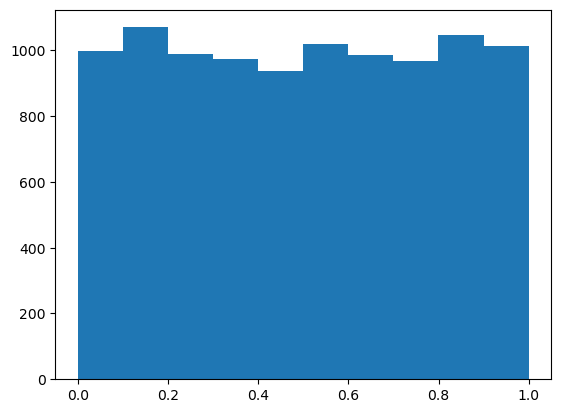

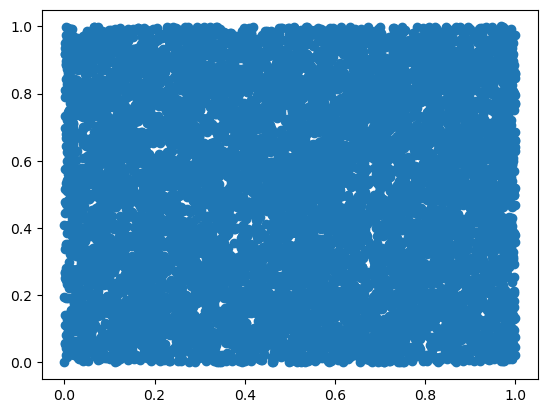


Chi-Squared Test

The test statistic is T= 14.056000000000001
The critical value is cv= 16.918977604620448
The null hypothesis is not rejected

Kolmogorov-Smirnov Test

The test statistic is: 0.7836600225900855
The null hypothesis is not rejected

Run Test I

The test statistic is Z= -1.580079013827469
The critical value is Z0= 1.959963984540054
The null hypothesis is not rejected

Run Test II

The test statistic is Z= 5.530997378975532
The critical value is cv= 12.591587243743977
The null hypothesis is not rejected

Correlation Test

The test statistic is Z= 0.796384226727874
The critical value is Z0= 1.959963984540054
The null hypothesis is not rejected


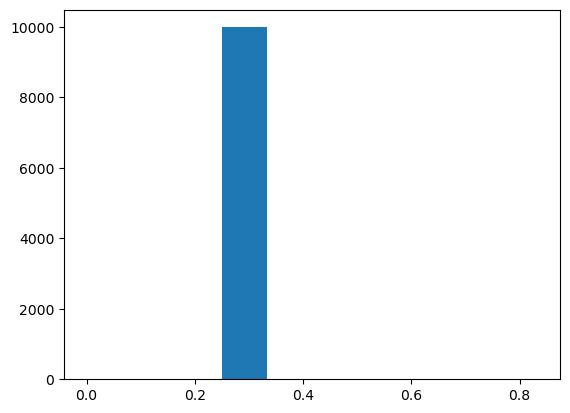

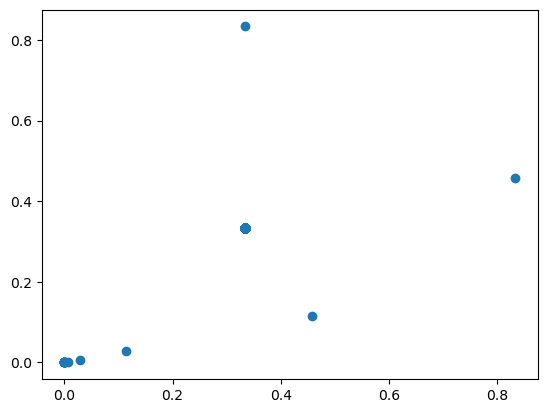


Chi-Squared Test

The test statistic is T= 89680.428
The critical value is cv= 16.918977604620448
The null hypothesis is rejected

Kolmogorov-Smirnov Test

The test statistic is: 66.72737380845942
The null hypothesis is rejected

Run Test I

The test statistic is Z= -101.83256740463756
The critical value is Z0= 1.959963984540054
The null hypothesis is rejected

Run Test II

The test statistic is Z= 55151.26581001478
The critical value is cv= 12.591587243743977
The null hypothesis is rejected

Correlation Test

The test statistic is Z= -63.04225321833771
The critical value is Z0= 1.959963984540054
The null hypothesis is rejected


In [14]:
x0=3; a=np.array([7**5,4]); c=np.array([1,2]); m=np.array([2**31+1,2**31]); n=10000
for i in range(2):
      u = lcg(x0,a[i],c[i],m[i],n)
      n_class = 10
      plt.hist(u, bins=n_class)
      plt.show()
      plt.scatter(u[1:],u[0:-1])
      plt.show()

      T = chi(u,n_class)
      cv = chi2.ppf(1 - 0.05, n_class-1)
      print("\nChi-Squared Test")
      print("\nThe test statistic is T=",T)
      print("The critical value is cv=",cv)
      if T < cv:
            print("The null hypothesis is not rejected")
      elif T > cv:
            print("The null hypothesis is rejected")
      else:
            print("...")

      fn,f,D = ks(u)
      level_sign = 1.358
      test_stat =  (math.sqrt(n) + 0.12 + (0.11/math.sqrt(n))) * D
      print("\nKolmogorov-Smirnov Test")
      print("\nThe test statistic is:", test_stat)
      if level_sign > test_stat:
            print("The null hypothesis is not rejected")
      else:
            print("The null hypothesis is rejected")

      Z = runtest1(u)
      print("\nRun Test I")
      print("\nThe test statistic is Z=",Z)
      Z0 = norm.ppf(1-0.05/2)
      print("The critical value is Z0=",Z0)
      if abs(Z) < Z0:
            print("The null hypothesis is not rejected")
      else:
            print("The null hypothesis is rejected")

      Z = runtest2(u)
      print("\nRun Test II")
      print("\nThe test statistic is Z=",Z)
      cv = chi2.ppf(1-0.05, 6)
      print("The critical value is cv=",cv)
      if cv > Z:
            print("The null hypothesis is not rejected")
      else:
            print("The null hypothesis is rejected")

      ch = cor(u,1)
      Z = (ch-0.25)/math.sqrt(7/(144*len(u)))
      print("\nCorrelation Test")
      print("\nThe test statistic is Z=",Z)
      Z0 = norm.ppf(1-0.05/2)
      print("The critical value is Z0=",Z0)
      if abs(Z) < Z0:
            print("The null hypothesis is not rejected")
      else:
            print("The null hypothesis is rejected")

2. Apply a system available generator and perform the various statistical tests you did under Part 1 point (b) for this generator too.

In [10]:
u = np.random.uniform(0,1,n)

T = chi(u,n_class)
cv = chi2.ppf(1 - 0.05, n_class-1)
print("\nChi-Squared Test")
print("\nThe test statistic is T=",T)
print("The critical value is cv=",cv)
if T < cv:
    print("The null hypothesis is not rejected")
elif T > cv:
    print("The null hypothesis is rejected")
else:
    print("...")

fn,f,D = ks(u)
level_sign = 1.358
test_stat =  (math.sqrt(n) + 0.12 + (0.11/math.sqrt(n))) * D
print("\nKolmogorov-Smirnov Test")
print("\nThe test statistic is:", test_stat)
if level_sign > test_stat:
      print("The null hypothesis is not rejected")
else:
      print("The null hypothesis is rejected")

Z = runtest1(u)
print("\nRun Test I")
print("\nThe test statistic is Z=",Z)
Z0 = norm.ppf(1-0.05/2)
print("The critical value is Z0=",Z0)
if abs(Z) < Z0:
      print("The null hypothesis is not rejected")
else:
      print("The null hypothesis is rejected")

Z = runtest2(u)
print("\nRun Test II")
print("\nThe test statistic is Z=",Z)
cv = chi2.ppf(1-0.05, 6)
print("The critical value is cv=",cv)
if cv > Z:
    print("The null hypothesis is not rejected")
else:
    print("The null hypothesis is rejected")

ch = cor(u,1)
Z = (ch-0.25)/math.sqrt(7/(144*len(u)))
print("\nCorrelation Test")
print("\nThe test statistic is Z=",Z)
Z0 = norm.ppf(1-0.05/2)
print("The critical value is Z0=",Z0)
if abs(Z) < Z0:
      print("The null hypothesis is not rejected")
else:
      print("The null hypothesis is rejected")


Chi-Squared Test

The test statistic is T= 4.14
The critical value is cv= 16.918977604620448
The null hypothesis is not rejected

Kolmogorov-Smirnov Test

The test statistic is: 0.8035005648725959
The null hypothesis is not rejected

Run Test I

The test statistic is Z= 1.3200660115520628
The critical value is Z0= 1.959963984540054
The null hypothesis is not rejected

Run Test II

The test statistic is Z= 15.378192362634248
The critical value is cv= 12.591587243743977
The null hypothesis is rejected

Correlation Test

The test statistic is Z= -1.689605090873064
The critical value is Z0= 1.959963984540054
The null hypothesis is not rejected


3. You were asked to simulate one sample and perform tests on this sample. Discuss the sufficiency of this approach and take action, if needed.

A single sample is not enough to test the performance of the algorithm. Multiple samples would produce a more accurate image of the capabilities of the implemented lcg.